In [58]:
# Schizophrenia Condition

import numpy as np

# Define parameters
Th = 0.1791
C = 0.35
Ir = 1
Ip = 1.5
μ1 = 0.0135
σ1 = 0.005
μ2 = 0.004
σ2 = 0.002
T = 50
σ = 2*np.pi/10
Δx = 2*np.pi/100
B = 1
N = 100
β = 0.5
θ = 0.5
μ_n = 0
σ_n = 0.005
ntrials = 5000
trials = 500

# Define sigmoid function
def sigmoid(x):
    return (1 / (1 + np.exp(-x))) - θ

# Define lateral interaction kernel
def lateral_kernel(i, j):
    return B*(((1/(np.sqrt(4*np.pi) * σ)) * np.exp((-((i-j)*Δx)**2) / (4*σ**2))) - C)

count = 0  # initialize count
count2 = 0 # initialize count2

for i in range(trials):
    # Initialize variables
    x = np.zeros(N) # internal state of nodes
    tau = np.zeros(N) # integration time constant
    for i in range(N//2):
        tau[i] = np.random.normal(μ1, σ1)
    for i in range(N//2, N):
        tau[i] = np.random.normal(μ2, σ2)
    w = np.zeros((N,N)) # synaptic efficacies
    for i in range(N):
        for j in range(N):
            w[i,j] = lateral_kernel(i, j)
    I_ext = np.zeros(N) # external input
    I_ext[18:22] = Ir
    I_ext[78:82] = Ip
    I_ext[20] = 0
    I_ext[80] = 0
    In = np.random.normal(μ_n, σ_n, (N, ntrials)) # background noise
    dt = 1 # time step
    nt = 5000 # number of time steps
    x_hist = np.zeros((N, nt)) # history of node activity
    reached_th = np.zeros(N) # to keep track of which nodes have reached threshold
    # Simulate network
    for i in range(nt):
        if i*dt >= 50:
            I_ext[18:22] = Ir
        if i*dt >= 100:
            I_ext[78:82] = Ip
        if i*dt >= 650:
            x[20] = 0
            x[80] = 0
            reached_th[20] = 0 # reset the threshold flag for node 20
        dxdt = -x + np.dot(w, (sigmoid(β*x))) + I_ext + In[:,i]
        x += dxdt * (tau)
        x_hist[:,i] = x * (0.126)
        
        # Check if node 20 reaches threshold before node 80
        #if x_hist[20,i] + 0.05 >= Th and x_hist[80,i] + 0.05 < Th:
        #    count += 1
        #    break
        
        # Check if node 20 or node 80 reaches threshold
        if x_hist[20,i] + 0.05 >= Th or x_hist[80,i] + 0.05 >= Th:
            # Check if both node 20 and node 80 have reached the threshold
            if x_hist[20,i] + 0.05 >= Th and x_hist[80,i] + 0.05 >= Th:
                # Check if node 20 reached the threshold before node 80
                if np.argmax(x_hist[:,i] == x_hist[20,i]) < np.argmax(x_hist[:,i] == x_hist[80,i]):
                    count += 1
                    break        
            # Check if only node 20 reached the threshold
            elif x_hist[20,i] + 0.05 >= Th and x_hist[80,i] + 0.05 < Th:
                count += 1
                break
                
for i in range(trials):
    # Initialize variables
    x = np.zeros(N) # internal state of nodes
    tau = np.zeros(N) # integration time constant
    for i in range(N//2):
        tau[i] = np.random.normal(μ1, σ1)
    for i in range(N//2, N):
        tau[i] = np.random.normal(μ2, σ2)
    w = np.zeros((N,N)) # synaptic efficacies
    for i in range(N):
        for j in range(N):
            w[i,j] = lateral_kernel(i, j)
    I_ext = np.zeros(N) # external input
    I_ext[18:22] = Ir
    I_ext[78:82] = Ip
    I_ext[20] = 0
    I_ext[80] = 0
    In = np.random.normal(μ_n, σ_n, (N, ntrials)) # background noise
    dt = 1 # time step
    nt = 5000 # number of time steps
    x_hist = np.zeros((N, nt)) # history of node activity
    reached_th = np.zeros(N) # to keep track of which nodes have reached threshold
    # Simulate network
    for i in range(nt):
        if i*dt >= 50:
            I_ext[18:22] = Ir
        if i*dt >= 100:
            I_ext[78:82] = Ip
        if i*dt >= 650:
            x[20] = 0
            x[80] = 0
            reached_th[20] = 0 # reset the threshold flag for node 20
        dxdt = -x + np.dot(w, (sigmoid(β*x))) + I_ext + In[:,i]
        x += dxdt * (tau)
        x_hist[:,i] = x * (0.126)
        
        # Check if node 20 reaches threshold before node 80
        #if x_hist[20,i] + 0.05 >= Th and reached_th[20] == 0:
        #    reached_th[20] = 1 # set the threshold flag for node 20
        #    continue
        #if x_hist[80,i] + 0.05 >= Th and reached_th[20] == 1:
        #    count2 += 1
        #    reached_th[80] = 1 # set the threshold flag for node 80
        #    break
            
        # Check if both node 20 and node 80 have reached the threshold
        if x_hist[20,i] + 0.05 >= Th and x_hist[80,i] + 0.05 >= Th:
            # Check if node 80 reached the threshold after node 20
            if np.argmax(x_hist[:,i] == x_hist[20,i]) < np.argmax(x_hist[:,i] == x_hist[80,i]):
                count2 += 1
                break

print("Schizophrenia Condition")
print()
print(f"(Error) Node 20 reached the threshold before node 80 in {count} out of {trials} trials.")
percentage = float((count/trials)*100)
print("(Error) Node 20 reached the threshold before Node 80 in {:.2f}% of simulations".format(percentage))

print(f"(Correction) Node 80 reached the threshold after node 20 in {count2} out of {count} times.")
percentage2 = float((count2/count)*100)
print("(Correction) Node 80 reached the threshold after Node 20 in {:.2f}% of simulations".format(percentage2))

C:\Users\micha\AppData\Local\Temp\ipykernel_12428\83448838.py:28: RuntimeWarning: overflow encountered in exp
  return (1 / (1 + np.exp(-x))) - θ


Schizophrenia Condition

(Error) Node 20 reached the threshold before node 80 in 259 out of 500 trials.
(Error) Node 20 reached the threshold before Node 80 in 51.80% of simulations
(Correction) Node 80 reached the threshold after node 20 in 161 out of 259 times.
(Correction) Node 80 reached the threshold after Node 20 in 62.16% of simulations


In [115]:
# Control Condition - Error Prosaccade RT

# This is computing the median distance for node 20 (so from 50 ms to when node 20 hits the threshold)

# Should be ~212 ms

import numpy as np

# Define parameters
Th = 0.1791
C = 0.35
Ir = 1
Ip = 1.5
μ1 = 0.01685
σ1 = 0.003
μ2 = 0.0065
σ2 = 0.0016
T = 50
σ = 2*np.pi/10
Δx = 2*np.pi/100
B = 1
N = 100
β = 0.5
θ = 0.5
μ_n = 0
σ_n = 0.005
ntrials = 5000

# Define sigmoid function
def sigmoid(x):
    return (1 / (1 + np.exp(-x))) - θ

# Define lateral interaction kernel
def lateral_kernel(i, j):
    return B*(((1/(np.sqrt(4*np.pi) * σ)) * np.exp((-((i-j)*Δx)**2) / (4*σ**2))) - C)

distances = []

for i in range(500):
    # Initialize variables
    x = np.zeros(N) # internal state of nodes
    tau = np.zeros(N) # integration time constant
    for i in range(N//2):
        tau[i] = np.random.normal(μ1, σ1)
    for i in range(N//2, N):
        tau[i] = np.random.normal(μ2, σ2)
    w = np.zeros((N,N)) # synaptic efficacies
    for i in range(N):
        for j in range(N):
            w[i,j] = lateral_kernel(i, j)
    I_ext = np.zeros(N) # external input
    I_ext[18:22] = Ir
    I_ext[78:82] = Ip
    I_ext[20] = 0
    I_ext[80] = 0
    In = np.random.normal(μ_n, σ_n, (N, ntrials)) # background noise
    dt = 1 # time step
    nt = 5000 # number of time steps
    x_hist = np.zeros((N, nt)) # history of node activity
    # Simulate network
    for i in range(5000):
        if i*dt >= 50:
            I_ext[18:22] = Ir
        if i*dt >= 100:
            I_ext[78:82] = Ip
        if i*dt >= 650:
            x[20] = 0
            x[80] = 0
        dxdt = -x + np.dot(w, (sigmoid(β*x))) + I_ext + In[:,i]
        x += dxdt * (tau)
        x_hist[:,i] = x * (0.126)
        
        if x_hist[20,i] + 0.05 >= Th and x_hist[80,i] + 0.05 < Th:
            point = (i*dt - 50) + 30 # Plus 30 ms to account for time it takes for neural signal
            print(point)
            distances.append(point)
            break
                    
median_distance = np.median(distances)
std_distance = np.std(distances)
print('Median distance: ', median_distance)
print('Standard Deviation: ', std_distance)

228
215
233
197
201
230
229
196
201
223
242
238
260
197
243
194
234
207
205
215
210
222
190
189
279
243
200
271
194
207
267
196
244
252
240
222
217
194
236
221
196
188
254
236
215
189
184
163
251
197
188
235
191
242
202
206
209
226
220
193
218
168
209
251
241
191
218
237
212
189
257
269
253
223
212
214
172
218
210
208
215
198
180
262
234
273
216
180
221
208
229
210
196
296
220
183
207
228
187
228
203
235
174
240
282
237
216
242
242
272
200
216
176
198
246
221
188
212
279
209
178
205
229
166
203
221
206
219
223
215
308
208
201
190
185
278
190
190
179
233
261
248
194
187
230
197
223
224
190
230
227
210
270
202
216
263
219
202
226
232
219
191
256
232
330
207
202
203
214
204
246
260
225
184
195
239
203
188
170
211
164
234
200
185
229
209
260
182
201
199
242
210
204
236
299
211
188
241
235
213
236
169
200
207
168
213
202
180
241
211
219
191
237
219
232
264
216
208
159
216
221
190
209
246
223
217
186
194
199
216
246
208
264
211
184
275
243
287
201
191
186
223
214
237
170
205
180
238
280
253


In [576]:
# Control Condition - Antisaccade RT

# This is the median distance for node 80 (the time from 100 ms to when node 80 reaches the threshold)

# Should be ~304-308

import numpy as np

# Define parameters
Th = 0.1791
C = 0.35
Ir = 1
Ip = 1.5
μ1 = 0.01685
σ1 = 0.003
μ2 = 0.0065
σ2 = 0.0016
T = 50
σ = 2*np.pi/10
Δx = 2*np.pi/100
B = 1
N = 100
β = 0.5
θ = 0.5
μ_n = 0
σ_n = 0.05
ntrials = 5000

# Define sigmoid function
def sigmoid(x):
    return (1 / (1 + np.exp(-x))) - θ

# Define lateral interaction kernel
def lateral_kernel(i, j):
    return B*(((1/(np.sqrt(4*np.pi) * σ)) * np.exp((-((i-j)*Δx)**2) / (4*σ**2))) - C)

distances = []

for i in range(300):
    # Initialize variables
    x = np.zeros(N) # internal state of nodes
    tau = np.zeros(N) # integration time constant
    for i in range(N//2):
        tau[i] = np.random.normal(μ1, σ1)
    for i in range(N//2, N):
        tau[i] = np.random.normal(μ2, σ2)
    w = np.zeros((N,N)) # synaptic efficacies
    for i in range(N):
        for j in range(N):
            w[i,j] = lateral_kernel(i, j)
    I_ext = np.zeros(N) # external input
    I_ext[18:22] = Ir
    I_ext[78:82] = Ip
    I_ext[20] = 0
    I_ext[80] = 0
    In = np.random.normal(μ_n, σ_n, (N, ntrials)) # background noise
    dt = 1 # time step
    nt = 5000 # number of time steps
    x_hist = np.zeros((N, nt)) # history of node activity
    # Simulate network
    for i in range(5000):
        if i*dt >= 50:
            I_ext[18:22] = Ir
        if i*dt >= 100:
            I_ext[78:82] = Ip
        if i*dt >= 650:
            x[20] = 0
            x[80] = 0
        dxdt = -x + np.dot(w, (sigmoid(β*x))) + I_ext + In[:,i]
        x += dxdt * (tau)
        x_hist[:,i] = x * (0.126)
        
        #if x[79] >= Th and x[19] < Th:
        #    if x_hist[80,i] + 0.05 >= 0.1791 and x_hist[80,i] + 0.05 <= 0.1792:
        #        point = (i*dt + 30) - 100
        #        #print(point)
        #        distances.append(point)
        #        break
        
        #if x_hist[80,i] + 0.05 >= Th and x_hist[80,i] + 0.05 <= 0.1792 and x_hist[20,i] + 0.05 < Th:
        #        point = (i*dt + 30) - 100
        #        print(point)
        #        distances.append(point)
        #        break
        
        """
        if x_hist[80,i] + 0.05 >= Th and x_hist[20,i] + 0.05 >= Th:
            if np.argmax(x_hist[80,i:]) < np.argmax(x_hist[20,i:]):
                point = (np.argmax(x_hist[80,i:]) + i)*dt - (np.argmax(x_hist[20,i:]) + i)*dt
                distances.append(point)
                break
            else:
                if i*dt + 30 < 100:
                    point = 100 - (i*dt + 30)
                    distances.append(point)
                    print(point)
                    break
                else:
                    point = i*dt + 30 - 100
                    distances.append(point)
                    print(point)
                    break
        """
        
        if x_hist[80,i] + 0.05 >= Th and x_hist[20,i] + 0.05 < Th:
            point = (i*dt - 100) + 30 # Plus 30 to account for travel time of neural signal
            print(point)
            distances.append(point)
            break
        
           
        # Check if both node 20 and node 80 have reached the threshold
        #if x_hist[20,i] + 0.05 < Th and x_hist[80,i] + 0.05 >= Th:
        #    point = (i*dt + 30) - 100
        #    print(point)
        #    distances.append(point)
        #    break
        
        # Check if node 80 reaches threshold Th before node 20 does
        #if x_hist[80,i] + 0.05 >= Th and x_hist[80,i] + 0.05 < 0.1792 and x_hist[20,i] + 0.05 < Th:
        #    point = (i*dt - 100) + 30
        #    print(i*dt)
        #    print(point)
        #    distances.append(point)
        #    break
        
median_distance = np.median(distances)
std_distance = np.std(distances)
print('Median distance: ', median_distance)
print(std_distance)

328
276
333
335
265
296
323
283
296
329
332
260
252
361
318
259
270
292
343
292
286
304
296
296
332
446
290
325
306
285
241
428
381
350
320
261
275
344
377
306
277
334
281
315
240
356
286
283
407
277
452
263
289
360
382
231
266
353
365
288
414
252
515
275
270
267
258
280
391
308
299
399
260
273
347
328
201
301
316
283
323
439
279
422
291
335
321
313
324
309
285
308
317
264
285
243
308
291
382
317
353
269
332
266
289
357
399
251
336
330
267
389
271
275
281
306
371
306
336
271
548
307
295
253
229
278
413
286
254
388
325
378
307
316
256
321
311
289
234
307
416
317
288
450
303
299
323
306
306
545
329
299
331
257
275
275
451
263
320
318
250
291
322
346
303
304
344
386
300
276
292
342
219
367
359
262
289
258
328
286
Median distance:  306.0
56.36913036427555


In [578]:
# Schizophrenia Condition - Error Prosaccade RT

# This is computing the median distance for node 20 (so from 50 ms to when node 20 hits the threshold)

# Should be ~230 ms

import numpy as np

# Define parameters
Th = 0.1791
C = 0.35
Ir = 1
Ip = 1.5
μ1 = 0.0135
σ1 = 0.005
μ2 = 0.004
σ2 = 0.002
T = 50
σ = 2*np.pi/10
Δx = 2*np.pi/100
B = 1
N = 100
β = 0.5
θ = 0.5
μ_n = 0
σ_n = 0.05
ntrials = 5000

# Define sigmoid function
def sigmoid(x):
    return (1 / (1 + np.exp(-x))) - θ

# Define lateral interaction kernel
def lateral_kernel(i, j):
    return B*(((1/(np.sqrt(4*np.pi) * σ)) * np.exp((-((i-j)*Δx)**2) / (4*σ**2))) - C)

distances = []

for i in range(300):
    # Initialize variables
    x = np.zeros(N) # internal state of nodes
    tau = np.zeros(N) # integration time constant
    for i in range(N//2):
        tau[i] = np.random.normal(μ1, σ1)
    for i in range(N//2, N):
        tau[i] = np.random.normal(μ2, σ2)
    w = np.zeros((N,N)) # synaptic efficacies
    for i in range(N):
        for j in range(N):
            w[i,j] = lateral_kernel(i, j)
    I_ext = np.zeros(N) # external input
    I_ext[18:22] = Ir
    I_ext[78:82] = Ip
    I_ext[20] = 0
    I_ext[80] = 0
    In = np.random.normal(μ_n, σ_n, (N, ntrials)) # background noise
    dt = 1 # time step
    nt = 5000 # number of time steps
    x_hist = np.zeros((N, nt)) # history of node activity
    # Simulate network
    for i in range(nt):
        if i*dt >= 50:
            I_ext[18:22] = Ir
        if i*dt >= 100:
            I_ext[78:82] = Ip
        if i*dt >= 650:
            x[20] = 0
            x[80] = 0
        dxdt = -x + np.dot(w, (sigmoid(β*x))) + I_ext + In[:,i]
        x += dxdt * (tau)
        x_hist[:,i] = x * (0.126)
                
        if x_hist[20,i] + 0.05 >= Th and x_hist[80,i] + 0.05 < Th:
            point = (i*dt - 50) + 30 # Plus 30 ms to account for time it takes for neural signal
            print(point)
            distances.append(point)
            break
                    
median_distance = np.median(distances)
std_distance = np.std(distances)
print('Median distance: ', median_distance)
print(std_distance)

183
421
200
256
172
248
205
216


C:\Users\micha\AppData\Local\Temp\ipykernel_3816\2194810657.py:31: RuntimeWarning: overflow encountered in exp
  return (1 / (1 + np.exp(-x))) - θ


299
201
178
330
218
233
270
192
216
193
234
251
148
307
162
215
247
221
165
284
310
481
240
208
224
136
168
229
281
230
158
244
194
215
234
241
289
261
265
191
300
250
220
316
243
207
176
172
362
250
230
468
218
232
171
155
203
279
242
174
260
201
317
236
179
207
254
193
184
287
180
174
200
279
248
135
199
263
145
186
172
206
208
283
250
261
204
208
188
298
221
164
187
262
272
195
175
217
211
194
216
319
231
243
407
285
292
306
256
315
167
142
236
198
281
231
361
493
161
204
187
245
224
202
211
179
255
192
191
212
183
224
212
243
190
178
253
314
388
265
216
237
221
251
238
301
300
274
180
311
180
273
278
223
215
196
213
209
336
257
322
346
221
205
200
237
253
252
274
265
250
362
201
230
206
217
254
363
265
276
222
253
191
204
Median distance:  226.5
60.504931708644285


In [48]:
# Schizophrenia Condition - Antisaccade RT

# This is the median distance for node 80 (the time from 100 ms to when node 80 reaches the threshold)

# Should be ~372-379

import numpy as np

# Define parameters
Th = 0.1791
C = 0.35
Ir = 1
Ip = 1.5
μ1 = 0.0135
σ1 = 0.005
μ2 = 0.004
σ2 = 0.002
T = 50
σ = 2*np.pi/10
Δx = 2*np.pi/100
B = 1
N = 100
β = 0.5
θ = 0.5
μ_n = 0
σ_n = 0.05
ntrials = 5000

# Define sigmoid function
def sigmoid(x):
    return (1 / (1 + np.exp(-x))) - θ

# Define lateral interaction kernel
def lateral_kernel(i, j):
    return B*(((1/(np.sqrt(4*np.pi) * σ)) * np.exp((-((i-j)*Δx)**2) / (4*σ**2))) - C)

# Initialize variables
distances = []
for i in range(500):
    x = np.zeros(N) # internal state of nodes
    tau = np.zeros(N) # integration time constant
    for i in range(N//2):
        tau[i] = np.random.normal(μ1, σ1)
    for i in range(N//2, N):
        tau[i] = np.random.normal(μ2, σ2)
    w = np.zeros((N,N)) # synaptic efficacies
    for i in range(N):
        for j in range(N):
            w[i,j] = lateral_kernel(i, j)
    I_ext = np.zeros(N) # external input
    I_ext[18:22] = Ir
    I_ext[78:82] = Ip
    I_ext[20] = 0
    I_ext[80] = 0
    In = np.random.normal(μ_n, σ_n, (N, ntrials)) # background noise
    dt = 1 # time step
    nt = 5000 # number of time steps
    x_hist = np.zeros((N, nt)) # history of node activity

    # Simulate network
    for i in range(5000):
        if i*dt >= 50:
            I_ext[18:22] = Ir
        if i*dt >= 100:
            I_ext[78:82] = Ip
        if i*dt >= 650:
            x[20] = 0
            x[80] = 0
        dxdt = -x + np.dot(w, (sigmoid(β*x))) + I_ext + In[:,i]
        x += dxdt * (tau)
        x_hist[:,i] = x * (0.126)
        
        if x_hist[80,i] + 0.05 >= Th and x_hist[20,i] + 0.05 < Th:
            point = (i*dt - 100) + 30 # Plus 30 to account for travel time of neural signal
            print(point)
            distances.append(point)
            break
"""
        if x_hist[80,i] + 0.05 >= Th and x_hist[20,i] + 0.05 >= Th:
            if np.argmax(x_hist[80,i:]) < np.argmax(x_hist[20,i:]):
                point = (np.argmax(x_hist[80,i:]) + i)*dt - (np.argmax(x_hist[20,i:]) + i)*dt
                distances.append(point)
                break
            else:
                if i*dt + 30 < 100:
                    point = 100 - (i*dt + 30)
                    distances.append(point)
                    print(point)
                    break
                else:
                    point = i*dt + 30 - 100
                    distances.append(point)
                    print(point)
                    break
"""
                    
median_distance = np.median(distances)
std_distance = np.std(distances)
print('Median distance: ', median_distance)
print(std_distance)

456
268
348
420
304
281
397
291
351
308
320
380
357
367
438
372
307
424
442
219
418
411
322
321
516
265
407
353
291
380
370
407
415
444
451
376
518
336
226
384
279
277
222
385
316
410


C:\Users\micha\AppData\Local\Temp\ipykernel_3816\2987663707.py:31: RuntimeWarning: overflow encountered in exp
  return (1 / (1 + np.exp(-x))) - θ


388
430
404
491
406
275
317
449
327
324
343
330
381
483
551
533
407
323
511
395
264
416
385
311
294
316
201
539
294
269
498
464
417
532
428
351
408
432
456
396
388
347
300
324
396
349
296
433
339
457
300
511
399
312
417
299
569
439
250
373
418
285
333
325
579
334
346
318
436
456
338
382
279
382
367
377
515
361
394
386
447
266
399
363
411
313
333
286
325
349
278
288
330
476
244
354
321
290
518
501
245
369
320
251
408
273
383
453
328
439
329
534
343
394
330
340
325
377
479
311
273
242
238
509
Median distance:  367.0
79.36803610843185


In [45]:
# Parkinson's Condition Error Rate at Time Point 2 (See other file for Time Point 1)

import numpy as np

# Define parameters
Th = 0.1791
C = 0.35
Ir = 1
Ip = 1.5
μ1 = 0.0108
σ1 = 0.001
μ2 = 0.004
σ2 = 0.002
T = 50
σ = 2*np.pi/10
Δx = 2*np.pi/100
B = 1
N = 100
β = 0.5
θ = 0.5
μ_n = 0
σ_n = 0.005
ntrials = 5000
trials = 500

# Define sigmoid function
def sigmoid(x):
    return (1 / (1 + np.exp(-x))) - θ

# Define lateral interaction kernel
def lateral_kernel(i, j):
    return B*(((1/(np.sqrt(4*np.pi) * σ)) * np.exp((-((i-j)*Δx)**2) / (4*σ**2))) - C)

count = 0  # initialize count

for i in range(trials):
    # Initialize variables
    x = np.zeros(N) # internal state of nodes
    tau = np.zeros(N) # integration time constant
    for i in range(N//2):
        tau[i] = np.random.normal(μ1, σ1)
    for i in range(N//2, N):
        tau[i] = np.random.normal(μ2, σ2)
    w = np.zeros((N,N)) # synaptic efficacies
    for i in range(N):
        for j in range(N):
            w[i,j] = lateral_kernel(i, j)
    I_ext = np.zeros(N) # external input
    I_ext[18:22] = Ir
    I_ext[78:82] = Ip
    I_ext[20] = 0
    I_ext[80] = 0
    In = np.random.normal(μ_n, σ_n, (N, ntrials)) # background noise
    dt = 1 # time step
    nt = 5000 # number of time steps
    x_hist = np.zeros((N, nt)) # history of node activity
    reached_th = np.zeros(N) # to keep track of which nodes have reached threshold
    # Simulate network
    for i in range(nt):
        if i*dt >= 50:
            I_ext[18:22] = Ir
        if i*dt >= 100:
            I_ext[78:82] = Ip
        if i*dt >= 650:
            x[20] = 0
            x[80] = 0
            reached_th[20] = 0 # reset the threshold flag for node 20
        dxdt = -x + np.dot(w, (sigmoid(β*x))) + I_ext + In[:,i]
        x += dxdt * (tau)
        x_hist[:,i] = x * (0.126)
        
        # Check if node 20 reaches threshold before node 80
        if x_hist[20,i] + 0.05 >= Th and x_hist[80,i] + 0.05 < Th:
            count += 1
            break
        
        """
        # Check if node 20 or node 80 reaches threshold
        if x_hist[20,i] + 0.05 >= Th or x_hist[80,i] + 0.05 >= Th:
            # Check if both node 20 and node 80 have reached the threshold
            if x_hist[20,i] + 0.05 >= Th and x_hist[80,i] + 0.05 >= Th:
                # Check if node 20 reached the threshold before node 80
                if np.argmax(x_hist[:,i] == x_hist[20,i]) < np.argmax(x_hist[:,i] == x_hist[80,i]):
                    count += 1
                    break        
            # Check if only node 20 reached the threshold
            elif x_hist[20,i] + 0.05 >= Th and x_hist[80,i] + 0.05 < Th:
                count += 1
                break
        """

print("Schizophrenia Condition") # Meant to be Parkinson's, Not Schizophrenia
print()
print(f"(Error) Node 20 reached the threshold before node 80 in {count} out of {trials} trials.")
percentage = float((count/trials)*100)
print("(Error) Node 20 reached the threshold before Node 80 in {:.2f}% of simulations".format(percentage))

C:\Users\micha\AppData\Local\Temp\ipykernel_12428\75050045.py:28: RuntimeWarning: overflow encountered in exp
  return (1 / (1 + np.exp(-x))) - θ


Schizophrenia Condition

(Error) Node 20 reached the threshold before node 80 in 172 out of 500 trials.
(Error) Node 20 reached the threshold before Node 80 in 34.40% of simulations


In [61]:
# MSA Condition Error Rate At Time Point 1

import numpy as np

# Define parameters
Th = 0.1791
C = 0.35
Ir = 1
Ip = 1.5
μ1 = 0.01115
σ1 = 0.001
μ2 = 0.004
σ2 = 0.002
T = 50
σ = 2*np.pi/10
Δx = 2*np.pi/100
B = 1
N = 100
β = 0.5
θ = 0.5
μ_n = 0
σ_n = 0.005
ntrials = 5000
trials = 500

# Define sigmoid function
def sigmoid(x):
    return (1 / (1 + np.exp(-x))) - θ

# Define lateral interaction kernel
def lateral_kernel(i, j):
    return B*(((1/(np.sqrt(4*np.pi) * σ)) * np.exp((-((i-j)*Δx)**2) / (4*σ**2))) - C)

count = 0  # initialize count

for i in range(trials):
    # Initialize variables
    x = np.zeros(N) # internal state of nodes
    tau = np.zeros(N) # integration time constant
    for i in range(N//2):
        tau[i] = np.random.normal(μ1, σ1)
    for i in range(N//2, N):
        tau[i] = np.random.normal(μ2, σ2)
    w = np.zeros((N,N)) # synaptic efficacies
    for i in range(N):
        for j in range(N):
            w[i,j] = lateral_kernel(i, j)
    I_ext = np.zeros(N) # external input
    I_ext[18:22] = Ir
    I_ext[78:82] = Ip
    I_ext[20] = 0
    I_ext[80] = 0
    In = np.random.normal(μ_n, σ_n, (N, ntrials)) # background noise
    dt = 1 # time step
    nt = 5000 # number of time steps
    x_hist = np.zeros((N, nt)) # history of node activity
    reached_th = np.zeros(N) # to keep track of which nodes have reached threshold
    # Simulate network
    for i in range(nt):
        if i*dt >= 50:
            I_ext[18:22] = Ir
        if i*dt >= 100:
            I_ext[78:82] = Ip
        if i*dt >= 650:
            x[20] = 0
            x[80] = 0
            reached_th[20] = 0 # reset the threshold flag for node 20
        dxdt = -x + np.dot(w, (sigmoid(β*x))) + I_ext + In[:,i]
        x += dxdt * (tau)
        x_hist[:,i] = x * (0.126)
        
        # Check if node 20 reaches threshold before node 80
        if x_hist[20,i] + 0.05 >= Th and x_hist[80,i] + 0.05 < Th:
            count += 1
            break
        
        """
        # Check if node 20 or node 80 reaches threshold
        if x_hist[20,i] + 0.05 >= Th or x_hist[80,i] + 0.05 >= Th:
            # Check if both node 20 and node 80 have reached the threshold
            if x_hist[20,i] + 0.05 >= Th and x_hist[80,i] + 0.05 >= Th:
                # Check if node 20 reached the threshold before node 80
                if np.argmax(x_hist[:,i] == x_hist[20,i]) < np.argmax(x_hist[:,i] == x_hist[80,i]):
                    count += 1
                    break        
            # Check if only node 20 reached the threshold
            elif x_hist[20,i] + 0.05 >= Th and x_hist[80,i] + 0.05 < Th:
                count += 1
                break
        """

print("MSA Condition at T1")
print()
print(f"(Error) Node 20 reached the threshold before node 80 in {count} out of {trials} trials.")
percentage = float((count/trials)*100)
print("(Error) Node 20 reached the threshold before Node 80 in {:.2f}% of simulations".format(percentage))

C:\Users\micha\AppData\Local\Temp\ipykernel_12428\1052802830.py:28: RuntimeWarning: overflow encountered in exp
  return (1 / (1 + np.exp(-x))) - θ


MSA Condition at T1

(Error) Node 20 reached the threshold before node 80 in 189 out of 500 trials.
(Error) Node 20 reached the threshold before Node 80 in 37.80% of simulations


In [132]:
# MSA Condition Error Rate At Time Point 2

import numpy as np

# Define parameters
Th = 0.1791
C = 0.35
Ir = 1
Ip = 1.5
μ1 = 0.0105
σ1 = 0.001
μ2 = 0.0032678
σ2 = 0.00038
T = 50
σ = 2*np.pi/10
Δx = 2*np.pi/100
B = 1
N = 100
β = 0.5
θ = 0.5
μ_n = 0
σ_n = 0.005
ntrials = 5000
trials = 500

# Define sigmoid function
def sigmoid(x):
    return (1 / (1 + np.exp(-x))) - θ

# Define lateral interaction kernel
def lateral_kernel(i, j):
    return B*(((1/(np.sqrt(4*np.pi) * σ)) * np.exp((-((i-j)*Δx)**2) / (4*σ**2))) - C)

count = 0  # initialize count

for i in range(trials):
    # Initialize variables
    x = np.zeros(N) # internal state of nodes
    tau = np.zeros(N) # integration time constant
    for i in range(N//2):
        tau[i] = np.random.normal(μ1, σ1)
    for i in range(N//2, N):
        tau[i] = np.random.normal(μ2, σ2)
    w = np.zeros((N,N)) # synaptic efficacies
    for i in range(N):
        for j in range(N):
            w[i,j] = lateral_kernel(i, j)
    I_ext = np.zeros(N) # external input
    I_ext[18:22] = Ir
    I_ext[78:82] = Ip
    I_ext[20] = 0
    I_ext[80] = 0
    In = np.random.normal(μ_n, σ_n, (N, ntrials)) # background noise
    dt = 1 # time step
    nt = 5000 # number of time steps
    x_hist = np.zeros((N, nt)) # history of node activity
    reached_th = np.zeros(N) # to keep track of which nodes have reached threshold
    # Simulate network
    for i in range(nt):
        if i*dt >= 50:
            I_ext[18:22] = Ir
        if i*dt >= 100:
            I_ext[78:82] = Ip
        if i*dt >= 650:
            x[20] = 0
            x[80] = 0
            reached_th[20] = 0 # reset the threshold flag for node 20
        dxdt = -x + np.dot(w, (sigmoid(β*x))) + I_ext + In[:,i]
        x += dxdt * (tau)
        x_hist[:,i] = x * (0.126)
        
        # Check if node 20 reaches threshold before node 80
        if x_hist[20,i] + 0.05 >= Th and x_hist[80,i] + 0.05 < Th:
            count += 1
            break
        
        """
        # Check if node 20 or node 80 reaches threshold
        if x_hist[20,i] + 0.05 >= Th or x_hist[80,i] + 0.05 >= Th:
            # Check if both node 20 and node 80 have reached the threshold
            if x_hist[20,i] + 0.05 >= Th and x_hist[80,i] + 0.05 >= Th:
                # Check if node 20 reached the threshold before node 80
                if np.argmax(x_hist[:,i] == x_hist[20,i]) < np.argmax(x_hist[:,i] == x_hist[80,i]):
                    count += 1
                    break        
            # Check if only node 20 reached the threshold
            elif x_hist[20,i] + 0.05 >= Th and x_hist[80,i] + 0.05 < Th:
                count += 1
                break
        """

print("MSA Condition at T2")
print()
print(f"(Error) Node 20 reached the threshold before node 80 in {count} out of {trials} trials.")
percentage = float((count/trials)*100)
print("(Error) Node 20 reached the threshold before Node 80 in {:.2f}% of simulations".format(percentage))

MSA Condition at T2

(Error) Node 20 reached the threshold before node 80 in 220 out of 500 trials.
(Error) Node 20 reached the threshold before Node 80 in 44.00% of simulations


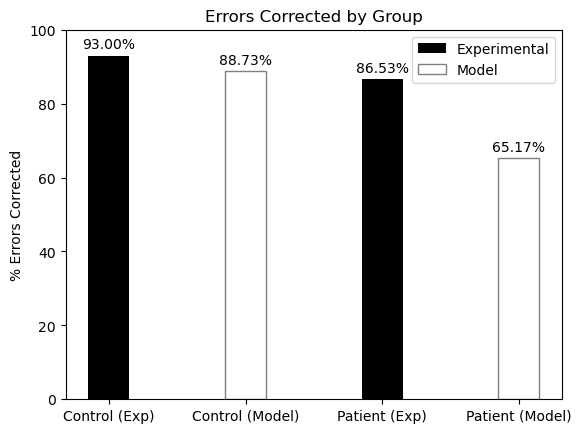

In [151]:
import matplotlib.pyplot as plt

# Data
control_errors_corrected = 93
patient_errors_corrected = 86.53

# Create the figure and axis objects
fig, ax = plt.subplots()

# Create the bars
bar1 = ax.bar(x='Control (Exp)', height=control_errors_corrected, width=0.3, color='black', label = 'Control')
bar3 = ax.bar(x='Control (Model)', height=88.73, width=0.3, color='white', edgecolor='black', alpha=0.5)
bar2 = ax.bar(x='Patient (Exp)', height=patient_errors_corrected, width=0.3, color='black')

# Add additional bars

bar4 = ax.bar(x='Patient (Model)', height=65.17, width=0.3, color='white', edgecolor='black', alpha=0.5)

# Set the y-axis limits
ax.set_ylim([0, 100])

# Add legend and title
ax.legend((bar1, bar3), ('Experimental', 'Model'))
ax.set_title('Errors Corrected by Group')
ax.set_ylabel('% Errors Corrected')

# Add value labels to the bars
def autolabel(rects):
    for rect in rects:
        height = rect.get_height()
        ax.annotate(f'{height:.2f}%', xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3), textcoords='offset points', ha='center', va='bottom')
        
autolabel(bar1)
autolabel(bar2)
autolabel(bar3)
autolabel(bar4)

# Display the plot
plt.show()

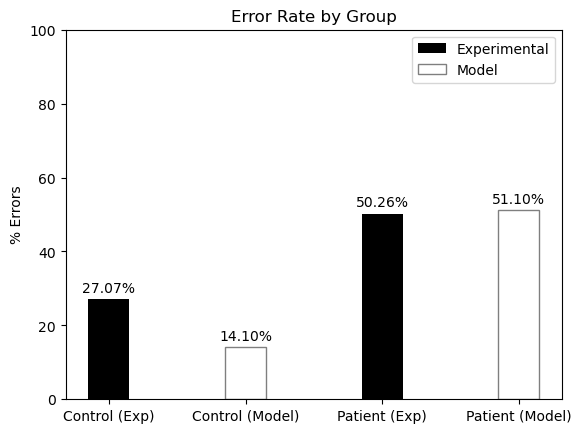

In [155]:
import matplotlib.pyplot as plt

# Data
control_errors_corrected = 27.07
patient_errors_corrected = 50.26

# Create the figure and axis objects
fig, ax = plt.subplots()

# Create the bars
bar1 = ax.bar(x='Control (Exp)', height=control_errors_corrected, width=0.3, color='black', label = 'Control')
bar3 = ax.bar(x='Control (Model)', height=14.10, width=0.3, color='white', edgecolor='black', alpha=0.5)
bar2 = ax.bar(x='Patient (Exp)', height=patient_errors_corrected, width=0.3, color='black')

# Add additional bars

bar4 = ax.bar(x='Patient (Model)', height=51.10, width=0.3, color='white', edgecolor='black', alpha=0.5)

# Set the y-axis limits
ax.set_ylim([0, 100])

# Add legend and title
ax.legend((bar1, bar3), ('Experimental', 'Model'))
ax.set_title('Error Rate by Group')
ax.set_ylabel('% Errors')

# Add value labels to the bars
def autolabel(rects):
    for rect in rects:
        height = rect.get_height()
        ax.annotate(f'{height:.2f}%', xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3), textcoords='offset points', ha='center', va='bottom')
        
autolabel(bar1)
autolabel(bar2)
autolabel(bar3)
autolabel(bar4)

# Display the plot
plt.show()

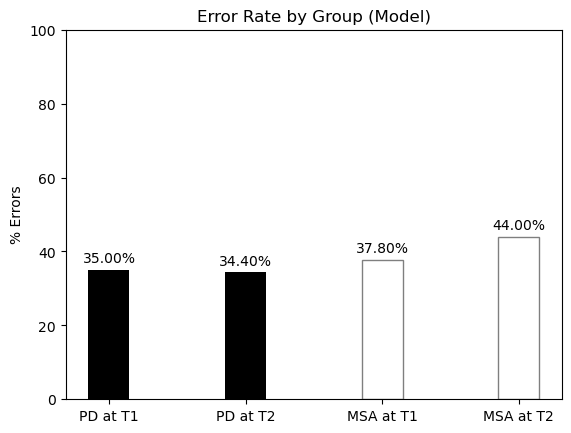

In [160]:
import matplotlib.pyplot as plt

# Data
control_errors_corrected = 35.00
patient_errors_corrected = 34.40

# Create the figure and axis objects
fig, ax = plt.subplots()

# Create the bars
bar1 = ax.bar(x='PD at T1', height=control_errors_corrected, width=0.3, color='black', label = 'Control')
bar2 = ax.bar(x='PD at T2', height=patient_errors_corrected, width=0.3, color='black')
bar3 = ax.bar(x='MSA at T1', height=37.80, width=0.3, color='white', edgecolor='black', alpha=0.5)
bar4 = ax.bar(x='MSA at T2', height=44.00, width=0.3, color='white', edgecolor='black', alpha=0.5)

# Set the y-axis limits
ax.set_ylim([0, 100])

# Add legend and title
#ax.legend((bar1, bar3), ('Experimental', 'Model'))
ax.set_title('Error Rate by Group (Model)')
ax.set_ylabel('% Errors')

# Add value labels to the bars
def autolabel(rects):
    for rect in rects:
        height = rect.get_height()
        ax.annotate(f'{height:.2f}%', xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3), textcoords='offset points', ha='center', va='bottom')
        
autolabel(bar1)
autolabel(bar2)
autolabel(bar3)
autolabel(bar4)

# Display the plot
plt.show()